In [1]:
import torch
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Building a linear regression model:**
- In this subsection, we will build a simple model to solve a linear regression problem. First, let's create a toy dataset in NumPy and visualize it:

In [2]:
X_train = np.arange(10, dtype='float32').reshape((10,1))
y_train = np.array([1.0,1.3,3.1,2.0,5.0,6.3,6.6,7.4,8.0,9.0],dtype='float32')

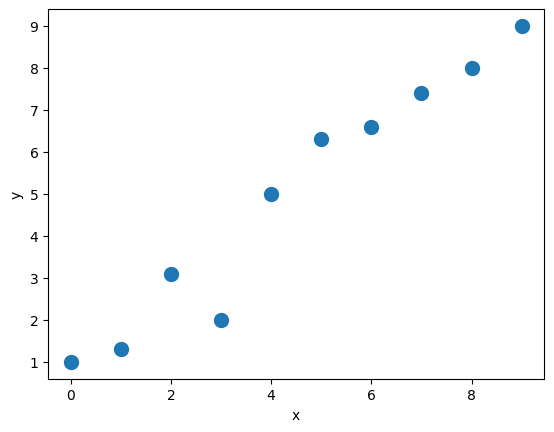

In [3]:
plt.plot(X_train,y_train,'o',markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

As a result -  training examples are shown in a scatterplot as shown

Next - we standardize the features - mean centering and dividing by the standard deviation  and create a pytorch dataset for the training set and a corresponding dataloader

In [10]:
from torch.utils.data import TensorDataset, DataLoader,Dataset

In [11]:
X_train_norm = (X_train - np.mean(X_train))/np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train).float()

train_ds = TensorDataset(X_train_norm,y_train)
batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [16]:
X_train_norm.shape

torch.Size([10, 1])

In [17]:
torch.manual_seed(1)

weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)

def model(xb):
    return xb @ weight + bias 

After defining the model, we can define the loss function that we want to minimize to the find the optimal model weights. Herem we will choose the mean squared error (MSE) as the loss:

In [18]:
def loss_fn(input, target):
    return (input - target).pow(2).mean()

In [26]:
learning_rate = 0.001
num_epochs = 200
log_epochs = 10

for epoch in range(num_epochs):
    for x_batch,y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch.long())
        loss.backward()
    with torch.no_grad():
        weight -= weight.grad* learning_rate
        bias -= bias.grad * learning_rate
        weight.grad.zero_()
        bias.grad.zero_()
    if epoch % log_epochs==0:
        print(f'Epoch {epoch} Loss {loss.item():.4f}')

Epoch 0 Loss 41.2725
Epoch 10 Loss 24.4285
Epoch 20 Loss 1.0575
Epoch 30 Loss 15.1630
Epoch 40 Loss 12.5989
Epoch 50 Loss 5.0840
Epoch 60 Loss 0.7865
Epoch 70 Loss 3.7489
Epoch 80 Loss 2.4036
Epoch 90 Loss 0.4430
Epoch 100 Loss 1.1155
Epoch 110 Loss 1.3195
Epoch 120 Loss 0.1064
Epoch 130 Loss 0.5676
Epoch 140 Loss 0.2216
Epoch 150 Loss 1.4862
Epoch 160 Loss 0.0483
Epoch 170 Loss 0.0061
Epoch 180 Loss 0.0016
Epoch 190 Loss 0.0294


Let's look at the trained model and plot it. For the test data, we will create a numpy array of values evenly spaced between 0 and 9. Since the model was trained with standardized features, we will also apply the same standardization to the test data:

In [27]:
weight

tensor([2.6453], requires_grad=True)

In [28]:
weight.item()

2.645277738571167

In [29]:
print('Final Parameters: ', weight.item(), bias.item())

Final Parameters:  2.645277738571167 4.715577602386475


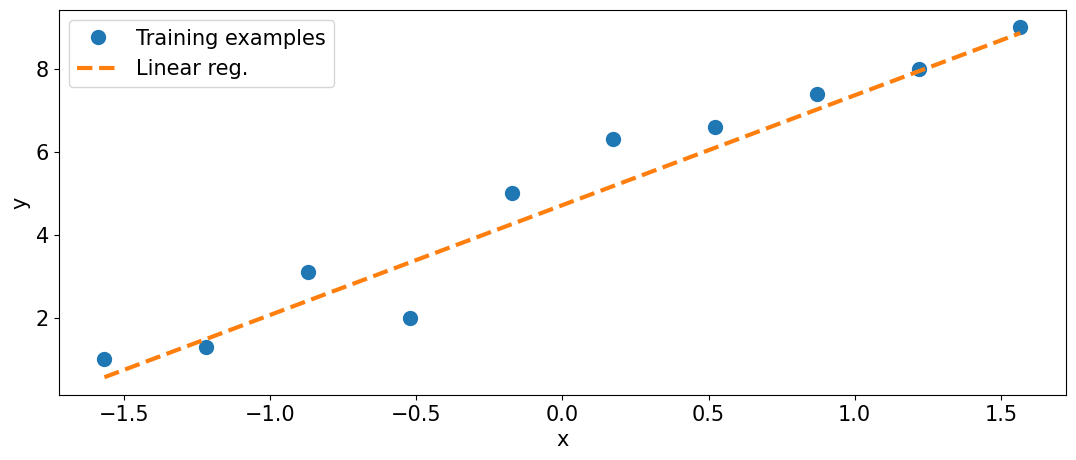

In [30]:
X_test = np.linspace(0,9,num=100,dtype='float32').reshape(-1,1)

X_test_norm = (X_test - np.mean(X_train))/np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()

fig, ax = plt.subplots(1,1,figsize=(13,5))
ax.plot(X_train_norm, y_train, 'o', markersize=10)
ax.plot(X_test_norm, y_pred, '--', lw=3)
ax.legend(['Training examples','Linear reg.'],fontsize=15)
ax.set_xlabel('x',size=15)
ax.set_ylabel('y',size=15)
ax.tick_params(axis='both',which='major',labelsize=15)
plt.show()

**Model Training via the torch.nn and torch.optim modules:**

Writing the loss function and gradient updates can be a repeatable task across different projects. The torch.nn module provides a set of loss functions, and torch.optim supports most commonly used optimization algorithms that can be called to update parameters based on the computed gradients. Below, we create a new MSE loss function and a stochastic gradient descent optimizer:/

In [31]:
import torch.nn as nn

In [47]:
loss_fn = nn.MSELoss(reduction='mean')
input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [48]:
for epoch in range(num_epochs):
    for x_batch,y_batch in train_dl:
        # 1. Generate predictions
        pred = model(x_batch)[:,0]
        # 2. Calculate loss
        loss = loss_fn(pred,y_batch)
        # 3. Compute the gradients
        loss.backward()
        # 4. Update parameters using gradients
        optimizer.step()
        # 5. Reser the gradients to zero
        optimizer.zero_grad()
    if epoch % log_epochs == 0:
        print(f'Epoch {epoch} Loss {loss.item():4f}')

Epoch 0 Loss 8.610544
Epoch 10 Loss 42.699223
Epoch 20 Loss 24.801943
Epoch 30 Loss 22.526985
Epoch 40 Loss 11.967747
Epoch 50 Loss 1.506664
Epoch 60 Loss 6.276282
Epoch 70 Loss 0.832786
Epoch 80 Loss 4.402733
Epoch 90 Loss 1.954255
Epoch 100 Loss 0.005333
Epoch 110 Loss 1.078817
Epoch 120 Loss 0.724057
Epoch 130 Loss 0.817678
Epoch 140 Loss 1.519390
Epoch 150 Loss 0.161495
Epoch 160 Loss 1.231890
Epoch 170 Loss 0.007673
Epoch 180 Loss 0.356048
Epoch 190 Loss 0.058931


After the model is trained, visualize the results and make sure they're similar to the results of the prev method:

In [41]:
print('Final Parameters:',model.weight.item(),model.bias.item())

Final Parameters: 2.6495909690856934 4.8773369789123535


In [45]:
print('Final Parameters:',model.weight.item(),model.bias.item())

Final Parameters: 2.6591789722442627 4.881324291229248


In [42]:
for x,y in train_dl:
    print(x.shape)
    print(y.shape)

torch.Size([1, 1])
torch.Size([1])
torch.Size([1, 1])
torch.Size([1])
torch.Size([1, 1])
torch.Size([1])
torch.Size([1, 1])
torch.Size([1])
torch.Size([1, 1])
torch.Size([1])
torch.Size([1, 1])
torch.Size([1])
torch.Size([1, 1])
torch.Size([1])
torch.Size([1, 1])
torch.Size([1])
torch.Size([1, 1])
torch.Size([1])
torch.Size([1, 1])
torch.Size([1])
